# Step 1: Load Data and imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)

In [19]:
df = pd.read_csv("data/coaster_db.csv")
print(df.head(10))

                             coaster_name            Length             Speed  \
0                      Switchback Railway    600 ft (180 m)  6 mph (9.7 km/h)   
1                       Flip Flap Railway               NaN               NaN   
2  Switchback Railway (Euclid Beach Park)               NaN               NaN   
3            Loop the Loop (Coney Island)               NaN               NaN   
4            Loop the Loop (Young's Pier)               NaN               NaN   
5                          Cannon Coaster               NaN               NaN   
6                           Leap-The-Dips  1,452 ft (443 m)  10 mph (16 km/h)   
7        Figure Eight (Euclid Beach Park)               NaN               NaN   
8                            Drop the Dip               NaN               NaN   
9      Scenic Railway (Euclid Beach Park)               NaN               NaN   

                         Location     Status   Opening date  \
0                    Coney Island    Removed 

In [15]:
print(df.columns)

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [17]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 2: Data Preparation

In [56]:
df_subset = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
     #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
    #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #  'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #  'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #  'Track layout', 'Fastrack available', 'Soft opening date.1',
    #  'Closing date', 
    'Opened', #'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']]

In [57]:
df_subset.shape

(1087, 14)

In [58]:
df_subset = df_subset.copy()
df_subset["opening_date_clean"] = pd.to_datetime(df_subset["opening_date_clean"])

In [59]:
df_subset["year_introduced"]

0       1884
1       1895
2       1896
3       1901
4       1901
        ... 
1082    2022
1083    2022
1084    2022
1085    2022
1086    2022
Name: year_introduced, Length: 1087, dtype: int64

In [53]:
df_subset.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [60]:
df_subset.rename(columns={"Inversions_clean":"Inversions",
                          "Gforce_clean":"Gforce"})

,coaster_name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,NaN,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [61]:
df_subset.isna().sum()

coaster_name             0
Location                 0
Status                 213
Manufacturer            59
Opened                1060
year_introduced          0
latitude               275
longitude              275
Type_Main                0
opening_date_clean     250
speed_mph              150
height_ft              916
Inversions_clean         0
Gforce_clean           725
dtype: int64

In [62]:
df_subset.loc[df_subset.duplicated()]

,coaster_name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean


In [63]:
df_subset.query("coaster_name == 'Crystal Beach Cyclone'")

,coaster_name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [64]:
df_subset = df_subset.loc[~df_subset.duplicated(subset=["coaster_name", "Location", "opening_date_clean"])].reset_index(drop=True).copy()

In [65]:
df_subset.shape

(990, 14)

In [66]:
df_subset.head()

,coaster_name,Location,Status,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


Text(0, 0.5, 'Count')

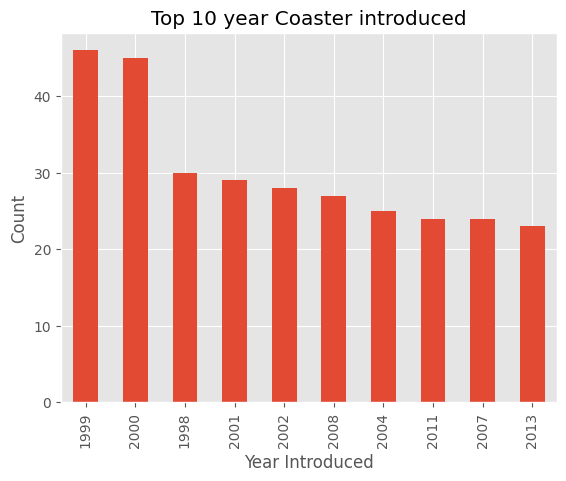

In [85]:
ax = df_subset["year_introduced"].value_counts().head(10).plot(kind="bar", title="Top 10 year Coaster introduced")
ax.set_xlabel("Year Introduced")
ax.set_ylabel("Count")

<Axes: ylabel='Frequency'>

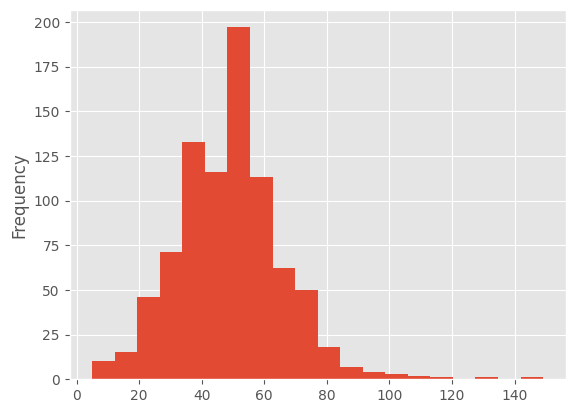

In [86]:
df_subset["speed_mph"].plot(kind="hist", bins=20)

<Axes: ylabel='Density'>

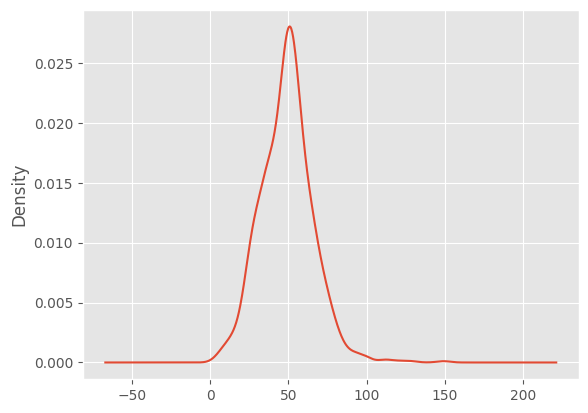

In [84]:
df_subset["speed_mph"].plot(kind="kde")

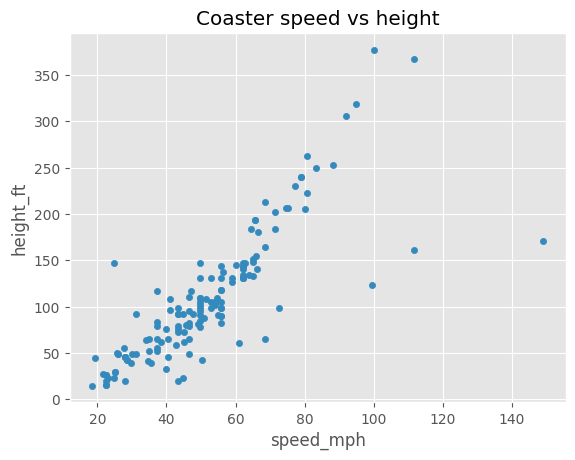

In [90]:
df_subset.plot(kind="scatter",
               x="speed_mph",
               y="height_ft",
              title="Coaster speed vs height")
plt.show()

<Axes: xlabel='speed_mph', ylabel='height_ft'>

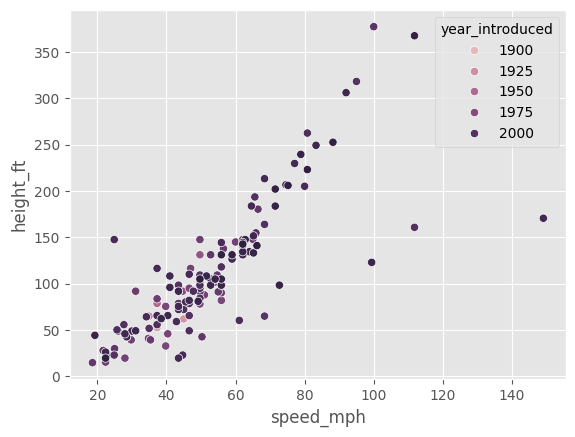

In [93]:
sns.scatterplot(x="speed_mph",
                y="height_ft",
                hue="year_introduced",
                data=df_subset)

In [96]:
df_subset.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions_clean',
       'Gforce_clean'],
      dtype='object')

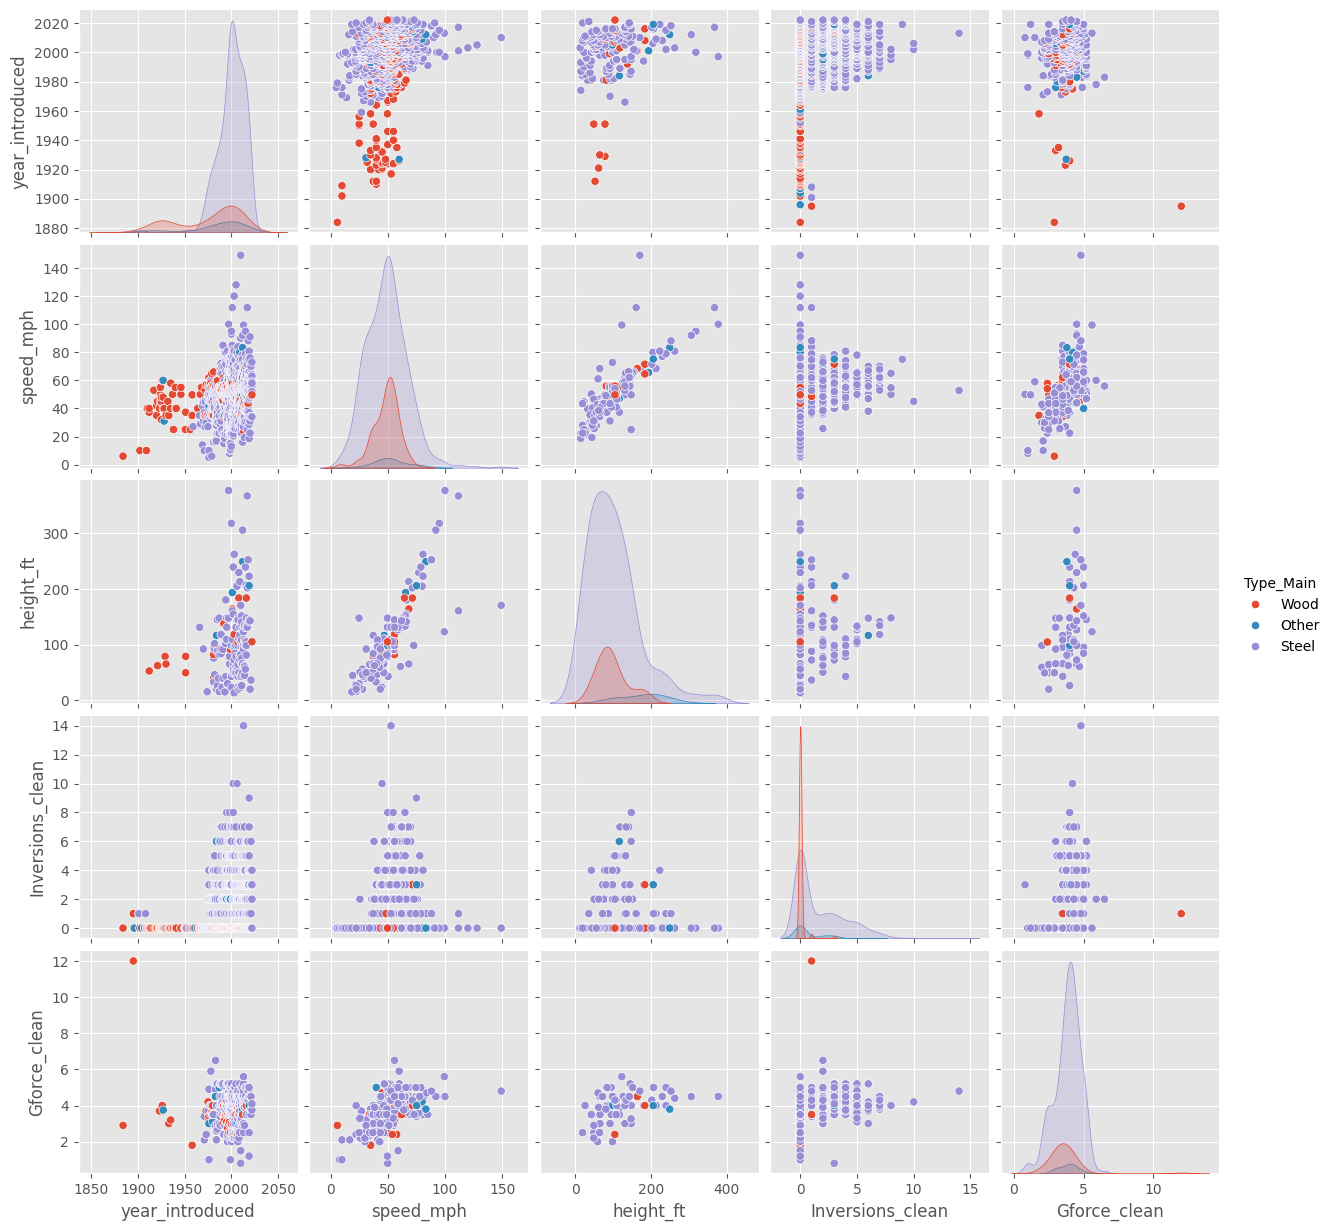

In [99]:
sns.pairplot(data=df_subset,
             vars=['year_introduced', 'speed_mph', 'height_ft', 'Inversions_clean', 'Gforce_clean'],
             hue="Type_Main")
plt.show()

In [101]:
df_corr = df_subset[['year_introduced', 'speed_mph', 'height_ft', 'Inversions_clean', 'Gforce_clean']].dropna().corr()

<Axes: >

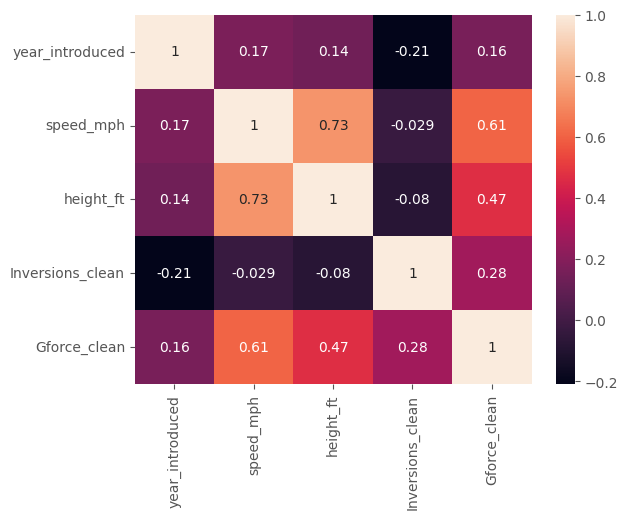

In [103]:
sns.heatmap(df_corr, annot=True)

In [105]:
df_subset["Location"].value_counts()

Location
Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: count, Length: 280, dtype: int64

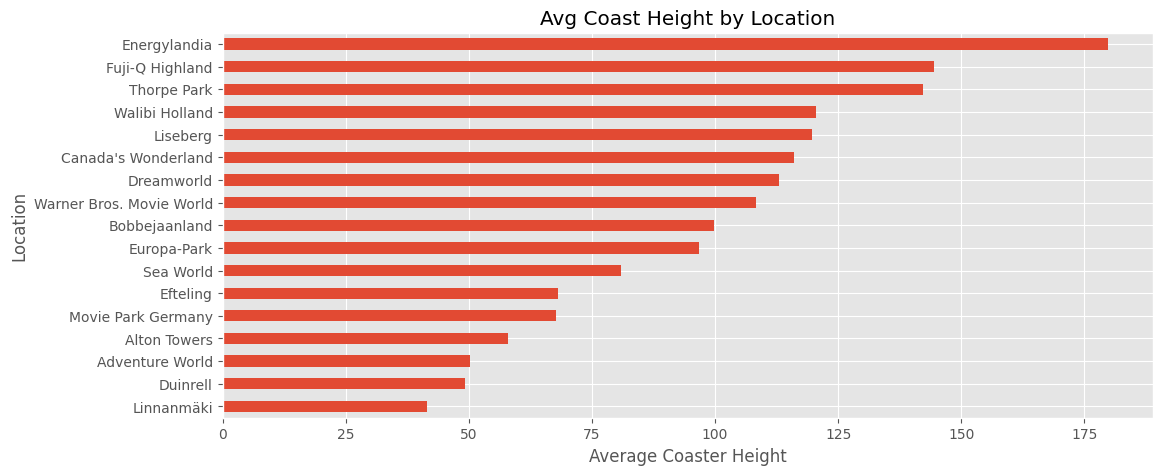

In [121]:
ax = df_subset.query('Location != "Other"').groupby("Location")["height_ft"].agg(["mean", "count"]) \
            .query("count >= 3") \
            .sort_values("mean")["mean"] \
            .plot(kind="barh", figsize=(12, 5), title="Avg Coast Height by Location")
ax.set_xlabel("Average Coaster Height")
plt.show()